In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
img_height = 32
img_width = 32
lr=0.0001
epochs= 150
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Normalizacion
x_train = x_train/255
x_test = x_test/255


y_train_en = to_categorical(y_train,10)
y_test_en = to_categorical(y_test,10)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(4,4), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
# Compilación del modelo con el optimizador y la funcion de loss que se indica en el enunciado
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Se establece el criterio de parada con un losss menor o igual 0.2
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1, restore_best_weights=True, baseline=0.2)

In [ ]:
model.summary()
history = model.fit(x_train, y_train_en, epochs = epochs, verbose=1,validation_data=(x_test,y_test_en))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 3, 3, 64)          0

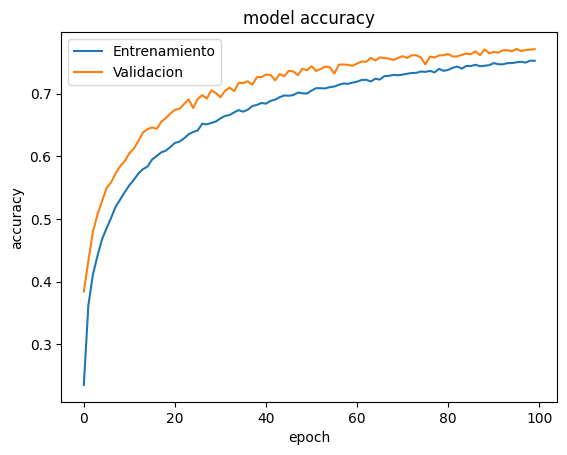

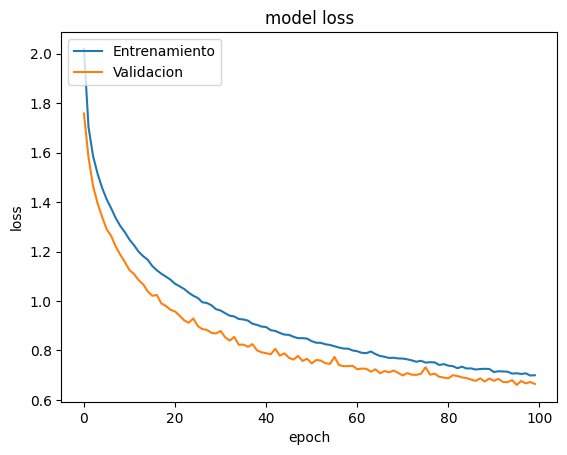

In [ ]:
# pintamos en una gráfica los datos del accuracy del entrenamiento y el acuracy de la validación
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper left')
plt.show()

# pintamos en una gráfica los datos del loss del entrenamiento y el loss de la validación
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.6645 - accuracy: 0.7712
Test Accuracy : 77.12%
313/313 [==============================] - 1s 2ms/step


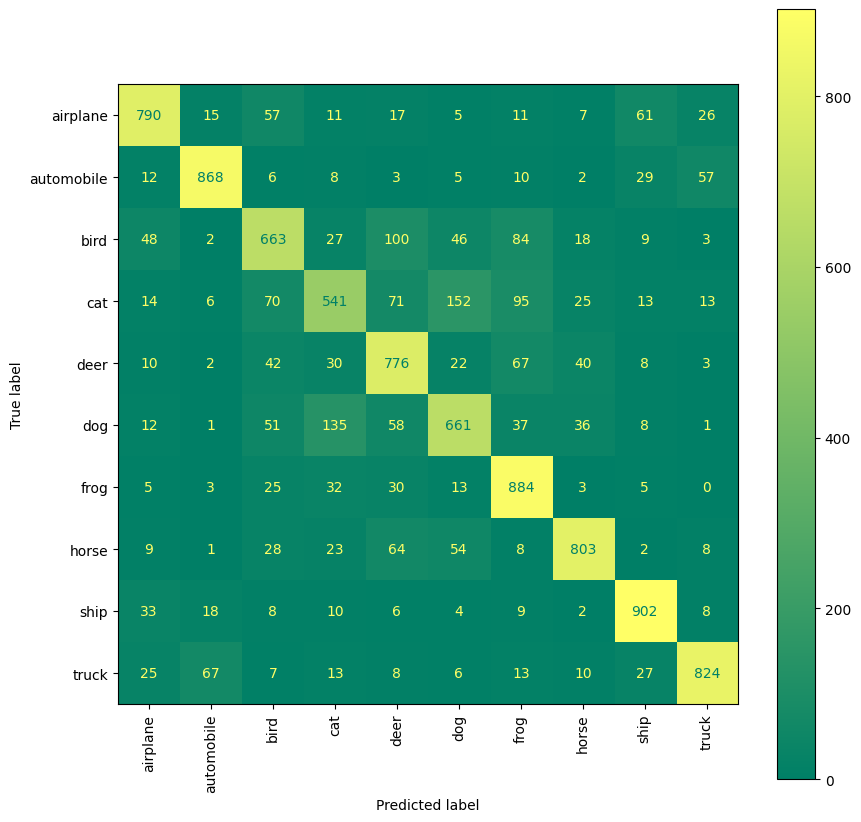

In [ ]:
evaluation = model.evaluate(x_test, y_test_en)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

 La imagen corresponde a la clase: [8]
1/1 [==============================] - 0s 210ms/step
El modelo ha predicho que la imagen 100 pertenece a la clase: 8 ship


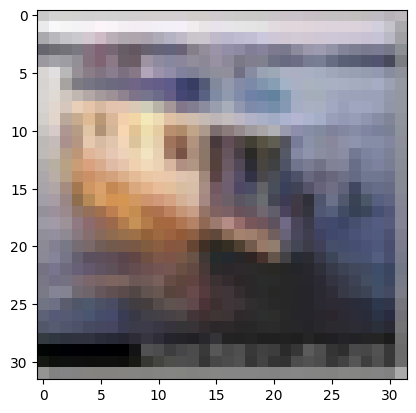

In [ ]:
imagen = x_test[6000]
plt.imshow(imagen)

print(f" La imagen corresponde a la clase: {y_test[6000]}")

pred = np.argmax(model.predict(imagen.reshape(1, 32, 32, 3)))
print(f"El modelo ha predicho que la imagen 100 pertenece a la clase: {pred} {labels[pred]}")